## Modelización

Empiezo a realizar un poco la parte de modelización para ir teniendo todo el proceso completo, auque sea de forma simple. Después se trataría de ir perfeccionando cada una de las partes del trabajo.

#### Partes necesarias y mejoras

Pls incluir todo lo que se os ocurra. Carta a los reyes magos. Después ya vemos como lo tenemos de tiempo para desarrollarlo.

- **Extracción de más datos**. Yo trataría de obtener más fuentes de datos. No sólo twitter. LinkedIn, Noticias (tratarlos como si el titular fuera una opinión más pero con más peso), Reddit, Youtube, Instagram, Glassdoor, google reviews... Esto nos dará un sentiment analysis de lo más completo, diferenciandonos de los infintos sentiment analyisis que hay por allí.

- **Transformación y feature engineering**. Debemos ser innovadores también en este aspecto.

- **Modelización**. Conseguir un gran modelo con la obtención de resultados precisos que hagan que el modelo pueda llegar a ser comerciable.

- **Visualizaciones e interpretabilidad** de los resultados que permitan la toma de decisiones en las empresas.

- Una **aplicación** atractiva e intuitiva (quizás web) para realizar este análisis de forma backend. El usuario podría decidir la empresa a analizar, plazo en el que buscar la información, redes sociales que analizar etc.
Ejemplo sencillito: https://share.streamlit.io/kritanjalijain/twitter_sentiment_analysis/main/app.py

## Cuestión 1 La variable output

* Queremos crear las clases nosotros mismos (a mano: neutral, positivo, negativo)
* Hacemos un clustering no supervisado y tomamos los resultados como la variable objetivo

## Cuestión 2 Tipo de análisis
* Está claro que necesitamos un sentiment analysis
* Pero estaría genial poder categorizar el texto que tenemos delante. En plan noticia, opinión, queja, etc. O por temática: nuevo producto, ERTES, proceso judicial, etc. Daría mucho juego.

## Empiezo con la modelización:

La base de datos al no tener todavía resultados la he extraído externamente. Sería empalmar el modelo a lo que tengamos cuando esté limpia y con variable dependiente.

In [ ]:
import numpy as np
import pandas as pd
import re
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

!pip install tweepy

#### El dataset

Consta de 1630 filas y son todo tweets de la empresa Apple. La variable dependiente consta de 3 clases: 
- -1 sentimiento negativo
- 0 sentimiento neutral
- 1 sentimiento positivo

In [ ]:
# Necesario pegar apple-twitter-sentiment-texts.csv en la carpeta sample_data del notebook
df = pd.read_csv("./sample_data/apple-twitter-sentiment-texts.csv")
df.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [ ]:
# Pasamos los valores de la variable dependiente a nombres de sentimiento (negativo, neutral, positivo)
# Dos formas de hacerlo:
# 1)
# for i in range(len(df.sentiment)):
#   if data.sentiment[i] == -1:
#     data["sentiment"][i] = "negative"
#   elif data.sentiment[i] == 0:
#     data["sentiment"][i] = "neutral"
#   else:
#     data["sentiment"][i] = "positive"

In [ ]:
# 2) Me parece mucho más limpio este código
df['sentiment'] = df['sentiment'].replace([-1, 0, 1], ["negative", "neutral", "positive"])
df.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,negative
1,What Happened To Apple Inc? http://t.co/FJEX...,neutral
2,Thank u @apple I can now compile all of the pi...,positive
3,The oddly uplifting story of the Apple co-foun...,neutral
4,@apple can i exchange my iphone for a differen...,neutral


In [ ]:
# Algo de visualizaciones (más que nada para ver en que consiste la base)
# No sería necesario en nuestro caso (ya lo deberíamos haber hecho este EDA)

df["sentiment"].value_counts()

# Como sospechábamos habrá más negativos que positivos. No creo que haya problema. Cuidado al escoger las metrics!

neutral     801
negative    686
positive    143
Name: sentiment, dtype: int64

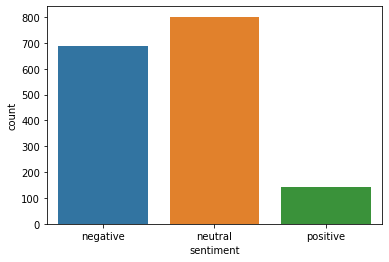

In [ ]:
# Con seaborn
sns.countplot(df["sentiment"])

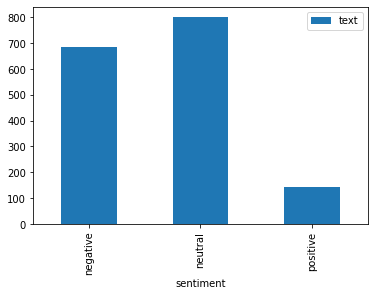

In [ ]:
# Matplotlib
df.groupby('sentiment').count().plot(kind='bar')

In [ ]:
# Una tartita para que el amigo Carlos Ortega se la gose

fig = px.pie(df, names='sentiment', title='Diferentes sentimientos según tweets')
fig.show()

In [ ]:
# Número de palabras en todo el dataset
text = " ".join(review for review in df.text)
print("Hay {} palabras en el dataset".format(len(text)))

Hay 157036 palabras en el dataset


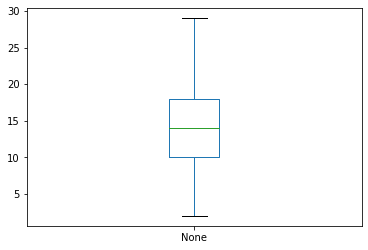

In [ ]:
# Calcular la longitud de cada tweet
tweet_len = pd.Series([len(tweet.split()) for tweet in df['text']])

# Distribuciones de las palabras por tweets
tweet_len.plot(kind='box')

In [ ]:
# No hay valores nulos
df.isnull().sum()

text         0
sentiment    0
dtype: int64

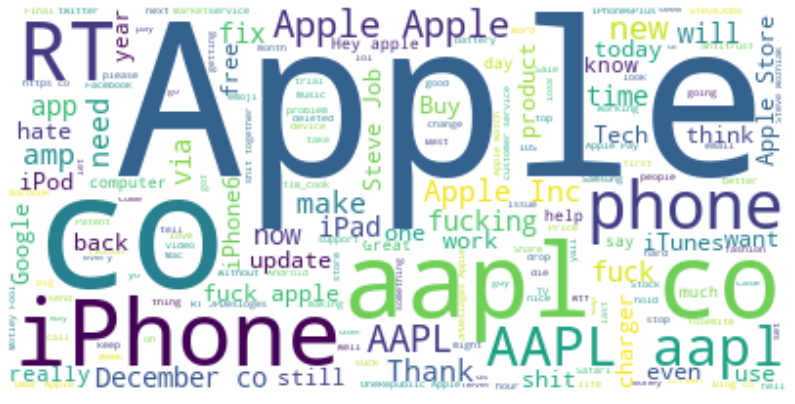

In [ ]:
# Word cloud. Me parece una visualización feísima pero informativa
# Ver alguna librería que lo haga de forma algo más atractiva

wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

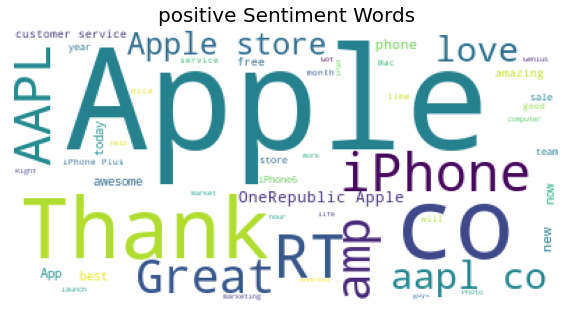

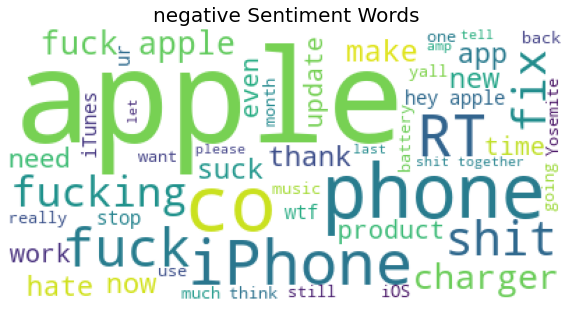

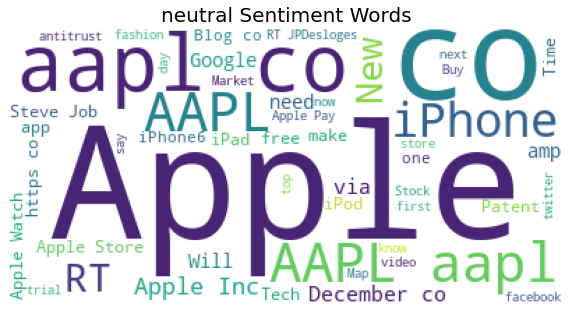

In [ ]:
# Lo mismo pero diferenciando según positivo, neutral o negativo
from wordcloud import STOPWORDS # con esto no incluimos stopwords en la visualización

def wordcount_gen(df, sentiment):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: positive/negative/neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df["sentiment"]==sentiment]['text']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords=STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(sentiment), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(df, 'positive')
     
# Negative tweet words
wordcount_gen(df, 'negative')
     
# Neutral tweet words
wordcount_gen(df, 'neutral')

In [ ]:
# Hay que limpiar los tweets
df.iloc[0].text

'Wow. Yall needa step it up @Apple RT @heynyla: Music and snapchat at the same damn time. Thank you #Note4'

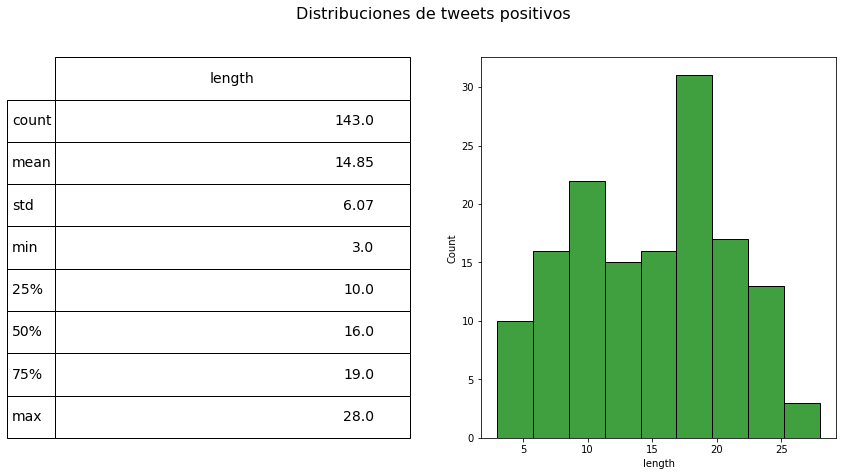

In [ ]:
# Diferencias según positividad o negatividad

fig = plt.figure(figsize=(14,7))
df['length'] = df["text"].str.split().apply(len)
df.head()
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='positive']['length'], ax=ax1, color='green')


ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
describe = df[df["sentiment"]=='positive']["length"].describe().to_frame().round(2)
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribuciones de tweets positivos', fontsize=16)

plt.show()

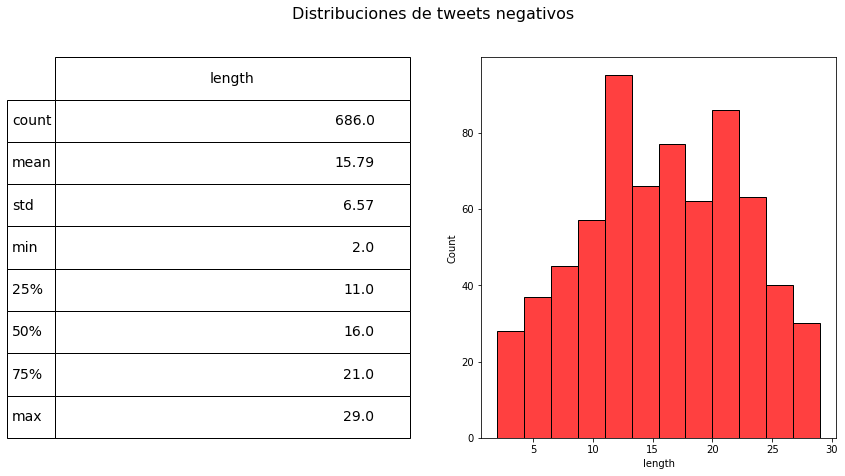

In [ ]:
# Mismo con las clases negativas (podría hacerse con las neutrales también)

fig = plt.figure(figsize=(14,7))
df['length'] = df["text"].str.split().apply(len)
df.head()
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='negative']['length'], ax=ax1, color='red')


ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
describe = df[df["sentiment"]=='negative']["length"].describe().to_frame().round(2)
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribuciones de tweets negativos', fontsize=16)

plt.show()

In [ ]:
# TRANSFORMACIONES Y PROCESAMIENTO

In [ ]:
# Definimos una función para eliminar caracteres innecesarios
# Muy básico todo. Lo principal es tener el modelo

def remove_chars(df):
  regex = "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|#[a-zA-Z]+|$[a-zA-Z]+|@[a-zA-Z]+|[,.^_$*%-;鶯!?:]"
  pattern = re.compile(regex)
  for i in range(len(df["text"])):
    df["text"][i] = pattern.sub('', df["text"][i])
    return df

remove_chars(df)
df.head()

,text,sentiment,length
0,Wow Yall needa step it up RT Music and snapc...,negative,20
1,What Happened To Apple Inc? http://t.co/FJEX...,neutral,10
2,Thank u @apple I can now compile all of the pi...,positive,19
3,The oddly uplifting story of the Apple co-foun...,neutral,17
4,@apple can i exchange my iphone for a differen...,neutral,15


In [ ]:
# Todo a minúsculas
# Quitamos stopwords
# Hacemos stemización

nltk.download('stopwords')

df_copy = df.copy()
stop = stopwords.words('english')
df_copy["text"] = df_copy["text"].str.lower().str.split()
df_copy["text"] = df_copy["text"].apply(lambda x: [item for item in x if item not in stop])
df_copy["text"] = df_copy["text"].apply(lambda x:[PorterStemmer().stem(w) for w in x])
df_copy.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,sentiment,length
0,"[wow, yall, needa, step, rt, music, snapchat, ...",negative,20
1,"[happen, appl, inc?, http://t.co/fjexi3op0u, #...",neutral,10
2,"[thank, u, @appl, compil, pic, commun, one, pl...",positive,19
3,"[oddli, uplift, stori, appl, co-found, sold, s...",neutral,17
4,"[@appl, exchang, iphon, differ, color, lmao, c...",neutral,15


In [ ]:
# Por el tema de la list comprehension hemos creado una lista en cada texto
# Habrá que eliminarlo

def words_to_string(df):
  for i in range(len(df)):
    df.iloc[i] = " ".join(df.iloc[i])
  return df


df_copy["text"] = words_to_string(df_copy["text"])
df_copy.head()

,text,sentiment,length
0,wow yall needa step rt music snapchat damn tim...,negative,20
1,happen appl inc? http://t.co/fjexi3op0u #aapl ...,neutral,10
2,thank u @appl compil pic commun one place http...,positive,19
3,oddli uplift stori appl co-found sold stake $8...,neutral,17
4,@appl exchang iphon differ color lmao chang mind,neutral,15


In [ ]:
# Tokenización
# Con el pad_sequences() de Keras

max_words = 500
max_len = 20

def tokenize_pad_sequences(text):
  '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
  '''
  # Tokenización
  tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
  tokenizer.fit_on_texts(text)
  # Transforma el texto a una secuencia de integers
  X = tokenizer.texts_to_sequences(text)
  # Juntas las que tienen misma longitud
  X = pad_sequences(X, padding='post', maxlen=max_len)
  # Return sequences
  return X, tokenizer

print("Antes de la tokenización & el padding: \n", df_copy["text"][0])
X, tokenizer = tokenize_pad_sequences(df_copy['text'])
print('Después: \n', X[0])

Antes de la tokenización & el padding: 
 wow yall needa step rt music snapchat damn time thank
Después: 
 [358 108 359   8  59 309  34  18   0   0   0   0   0   0   0   0   0   0
   0   0]


In [ ]:
# Si queremos guardar los datos tokenizados
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
# División train test

y = pd.get_dummies(df_copy['sentiment'])
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.10, random_state=1)

print('Train Set ->', train_data.shape, train_label.shape)
print('Test Set ->', test_data.shape, test_label.shape)

Train Set -> (1467, 20) (1467, 3)
Test Set -> (163, 20) (163, 3)


In [ ]:
# Modelo LSTM
# Puede aprender de la dependencia de orden en una secuencia. Como las frases
# en el lenguaje natural
vocab_size = tokenizer.document_count

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16),
    tf.keras.layers.LSTM(16, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          26080     
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 28,243
Trainable params: 28,243
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
history = model.fit(train_data, train_label, epochs=20, validation_data=(test_data, test_label))

Epoch 1/20
46/46 [==============================] - 2s 15ms/step - loss: 1.0252 - acc: 0.4976 - val_loss: 0.9117 - val_acc: 0.5644
Epoch 2/20
46/46 [==============================] - 0s 9ms/step - loss: 0.9024 - acc: 0.4833 - val_loss: 0.8822 - val_acc: 0.5644
Epoch 3/20
46/46 [==============================] - 0s 9ms/step - loss: 0.7747 - acc: 0.6960 - val_loss: 0.7969 - val_acc: 0.7239
Epoch 4/20
46/46 [==============================] - 0s 9ms/step - loss: 0.6392 - acc: 0.7689 - val_loss: 0.6651 - val_acc: 0.7607
Epoch 5/20
46/46 [==============================] - 0s 9ms/step - loss: 0.4859 - acc: 0.8153 - val_loss: 0.7009 - val_acc: 0.7669
Epoch 6/20
46/46 [==============================] - 0s 9ms/step - loss: 0.4169 - acc: 0.8309 - val_loss: 0.9339 - val_acc: 0.7301
Epoch 7/20
46/46 [==============================] - 0s 9ms/step - loss: 0.3839 - acc: 0.8425 - val_loss: 1.0873 - val_acc: 0.7791
Epoch 8/20
46/46 [==============================] - 0s 9ms/step - loss: 0.3599 - acc: 0.8

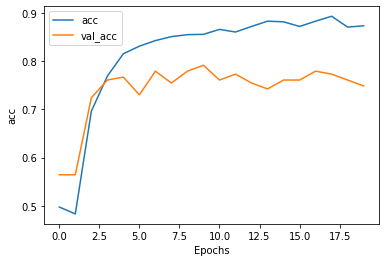

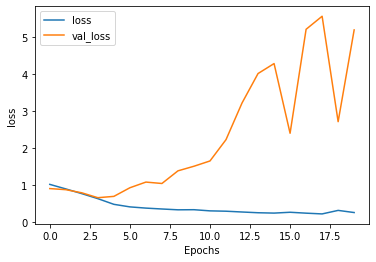

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [ ]:
# Un simple random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_data, train_label)
rf.score(test_data, test_label)

0.6871165644171779

In [ ]:
# Un LSTM un poco más complejito

In [ ]:
# Hacemos una mejor división y todo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (978, 20) (978, 3)
Validation Set -> (326, 20) (326, 3)
Test Set -> (326, 20) (326, 3)


In [ ]:
import keras.backend as K

# Función que define la metric, no usaremos accuracy por el tema que la
# variable dependiente está un poco descompensada
def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Embedding, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=30
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 20, 32)            160000    
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 20, 32)            3104      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 10, 32)            0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 64)                16640     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
_______________________________________________

In [ ]:
# Compilado
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Entrenamiento
batch_size = 64
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/30
16/16 [==============================] - 6s 140ms/step - loss: 1.0159 - accuracy: 0.4343 - precision_7: 0.4204 - recall_7: 0.0779 - val_loss: 0.9195 - val_accuracy: 0.4601 - val_precision_7: 0.5043 - val_recall_7: 0.3558
Epoch 2/30
16/16 [==============================] - 0s 14ms/step - loss: 0.9488 - accuracy: 0.4714 - precision_7: 0.4827 - recall_7: 0.2628 - val_loss: 0.9123 - val_accuracy: 0.4356 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 3/30
16/16 [==============================] - 0s 14ms/step - loss: 0.9396 - accuracy: 0.4742 - precision_7: 0.5387 - recall_7: 0.1118 - val_loss: 0.9057 - val_accuracy: 0.4540 - val_precision_7: 0.7708 - val_recall_7: 0.1135
Epoch 4/30
16/16 [==============================] - 0s 14ms/step - loss: 0.9276 - accuracy: 0.5749 - precision_7: 0.6661 - recall_7: 0.2016 - val_loss: 0.8997 - val_accuracy: 0.4540 - val_precision_7: 0.4959 - val_recall_7: 0.3712
Epoch 5/30
16/16 [==============================] - 0s 14ms/step - 

In [ ]:
# Evaluamos el modelo con el test
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.7638
Precision : 0.7946
Recall    : 0.7239
F1 Score  : 0.7576


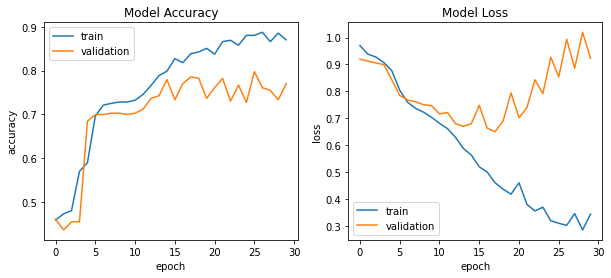

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

Se trata del propio dataset y de el tener 3 clases. Pero no son malos resultados para comenzar. A continuación matriz para ver dónde falla más

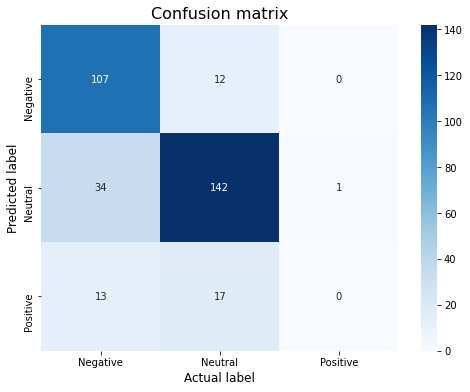

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
# Guardar modelo y pesos
model.save('best_model.h5')
print('Best model saved')

Best model saved


In [ ]:
from keras.models import load_model

# Cargar modelo
model = load_model('best_model.h5')